# Train Model

In [37]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import mydatalabeling as mdl
import myplotlib as mpl
import mytalib as mtal

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from datetime import datetime, timedelta
import types
import pandas as pd
import numpy as np
import multiprocessing as mp

In [38]:
df_all = pd.read_pickle('final_ds_labeled_small.pkl')
display(df_all.columns)
df_all.head()

Index(['Nr', 'date', 'open', 'high', 'low', 'close', 'sum_vol', 'time',
       'fastma', 'slowema', 'RSI_close_30', 'dir', 'touch_tp', 'cross_idx',
       'raw_return'],
      dtype='object')

,Nr,date,open,high,low,close,sum_vol,time,fastma,slowema,RSI_close_30,dir,touch_tp,cross_idx,raw_return
0,0,2017-01-03,0.0000,0.0000,-0.0100,0.0000,1232,09:30:08,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN
1,5,2017-01-03,-0.0195,0.0400,-0.0195,0.0000,1062,09:30:15,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN
2,11,2017-01-03,-0.0200,-0.0200,-0.1299,-0.1299,1196,09:31:04,-0.1299,-0.1299,-0.1299,0.0,0.0,0.0,NaN
3,16,2017-01-03,-0.1102,-0.1092,-0.1102,-0.1092,1066,09:32:07,-0.1092,-0.1092,-0.1092,0.0,0.0,0.0,NaN
4,18,2017-01-03,-0.1200,-0.0950,-0.1200,-0.0991,1319,09:32:08,-0.0991,-0.0991,-0.0991,0.0,0.0,0.0,NaN


# Prepare dataset

In [39]:
%%time
past_history = 10
target_col = ['touch_tp']
index_col = ['Nr', 'date', 'time', 'dir']
gname = '2017-06-07'
grby = ['date']
used_col = ['open', 'high', 'low', 'close', 'sum_vol', 'fastma', 'slowema', 'RSI_close_30']
#used_col = ['close']

grp = df_all.groupby(grby).get_group(gname)#.drop(grby, axis=1)
display(grp.shape)

rdf = mdl.create_rnn_data_mp(dataset=grp, start_index=0, end_index=None, history_size=past_history, target_col=target_col, index_col=index_col, grby=grby, used_col=used_col, isPadding=True)
display(rdf.head(10))

(229, 15)

,open,high,low,close,sum_vol,fastma,slowema,RSI_close_30,touch_tp,Nr,date,time,dir
0,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",0.0,6.0,2017-06-07,09:32:44,0.0
1,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",0.0,10.0,2017-06-07,09:32:46,0.0
2,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [-0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [11...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [33...",0.0,13.0,2017-06-07,09:33:05,0.0
3,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0300000...","[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.030000...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0010000...","[[0.0], [0.0], [0.0], [0.0], [0.0], [1100.0], ...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1022599...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1149667...","[[0.0], [0.0], [0.0], [0.0], [0.0], [33.350584...",0.0,18.0,2017-06-07,09:33:11,0.0
4,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0099999...","[[0.0], [0.0], [0.0], [0.0], [0.03000000000000...","[[0.0], [0.0], [0.0], [0.0], [-0.0300000000000...","[[0.0], [0.0], [0.0], [0.0], [0.00100000000000...","[[0.0], [0.0], [0.0], [0.0], [1100.0], [2500.0...","[[0.0], [0.0], [0.0], [0.0], [0.10225999999999...","[[0.0], [0.0], [0.0], [0.0], [0.11496670833863...","[[0.0], [0.0], [0.0], [0.0], [33.3505848631215...",0.0,25.0,2017-06-07,09:33:21,0.0
5,"[[0.0], [0.0], [0.0], [0.0], [0.00999999999999...","[[0.0], [0.0], [0.0], [0.030000000000001137], ...","[[0.0], [0.0], [0.0], [-0.030000000000001137],...","[[0.0], [0.0], [0.0], [0.0010000000000047748],...","[[0.0], [0.0], [0.0], [1100.0], [2500.0], [233...","[[0.0], [0.0], [0.0], [0.10225999999999687], [...","[[0.0], [0.0], [0.0], [0.11496670833863286], [...","[[0.0], [0.0], [0.0], [33.35058486312158], [37...",0.0,27.0,2017-06-07,09:33:22,0.0
6,"[[0.0], [0.0], [0.0], [0.009999999999990905], ...","[[0.0], [0.0], [0.030000000000001137], [0.0300...","[[0.0], [0.0], [-0.030000000000001137], [0.009...","[[0.0], [0.0], [0.0010000000000047748], [0.030...","[[0.0], [0.0], [1100.0], [2500.0], [2332.0], [...","[[0.0], [0.0], [0.10225999999999687], [0.09440...","[[0.0], [0.0], [0.11496670833863286], [0.10948...","[[0.0], [0.0], [33.35058486312158], [37.632228...",0.0,34.0,2017-06-07,09:33:36,0.0
7,"[[0.0], [0.0], [0.009999999999990905], [0.0067...","[[0.0], [0.030000000000001137], [0.03000000000...","[[0.0], [-0.030000000000001137], [0.0099999999...","[[0.0], [0.0010000000000047748], [0.0300000000...","[[0.0], [1100.0], [2500.0], [2332.0], [2150.0]...","[[0.0], [0.10225999999999687], [0.094409999999...","[[0.0], [0.11496670833863286], [0.109484985220...","[[0.0], [33.35058486312158], [37.6322283787844...",0.0,37.0,2017-06-07,09:33:41,0.0
8,"[[0.0], [0.009999999999990905], [0.00679999999...","[[0.030000000000001137], [0.030000000000001137...","[[-0.030000000000001137], [0.00999999999999090...","[[0.0010000000000047748], [0.03000000000000113...","[[1100.0], [2500.0], [2332.0], [2150.0], [1180...","[[0.10225999999999687], [0.09440999999999775],.

CPU times: user 223 ms, sys: 159 ms, total: 382 ms
Wall time: 489 ms


In [40]:
#f = grp.touch_tp != 0
#display(grp[f][['close','touch_tp','Nr']])
#f = rdf.touch_tp != 0
#display(rdf[f])

In [41]:
#rdf[f].close.iloc[0]

In [42]:
%%time
rdf = df_all.copy()
rdf = mdl.create_rnn_data_mp(dataset=rdf, start_index=0, end_index=None, history_size=past_history, target_col=target_col, index_col=index_col, grby=grby, used_col=used_col)

CPU times: user 2.26 s, sys: 265 ms, total: 2.53 s
Wall time: 4.92 s


In [43]:
#only events
f = rdf.touch_tp != 0.0
rdf = rdf[f]
rdf.touch_tp.value_counts()

-1.0    1550
 1.0    1347
Name: touch_tp, dtype: int64

In [44]:
#replace labels -1 -> 0
rdf.loc[:,'touch_tp']= rdf.loc[:,'touch_tp'].replace([-1.0], 0.0)

# Create dataset for RNN Model

In [45]:
rdf.head(1)

,open,high,low,close,sum_vol,fastma,slowema,RSI_close_30,touch_tp,Nr,date,time,dir
4,"[[-0.13049999999999784], [-0.1700000000000017]...","[[-0.13000000000000966], [-0.0799999999999983]...","[[-0.13049999999999784], [-0.1700000000000017]...","[[-0.13000000000000966], [-0.0799999999999983]...","[[1181], [1100], [1100], [1800], [1000], [1100...","[[-0.13000000000000966], [-0.0799999999999983]...","[[-0.13000000000000966], [-0.0799999999999983]...","[[-0.13000000000000966], [-0.0799999999999983]...",0.0,80,2017-01-03,09:37:00,1.0


In [46]:
#print(rdf.date.min(), rdf.date.max())

In [47]:
#select columns 
y_col = 'touch_tp'
x_cols = ['Nr', 'open', 'high', 'low', 'close', 'sum_vol', 'fastma', 'slowema', 'RSI_close_30', 'dir']
#x_cols = ['close', 'Nr']

#split to train test dataset
#train dataset from 2009 to 2017
f_train = rdf.date < "2017-07-01"
x_train_df = rdf.loc[f_train, x_cols]
y_train_df = rdf.loc[f_train, y_col]

#validation from 2018 to 2019
f_val = (rdf.date > "2017-09-01") 

x_val_df = rdf.loc[f_val,x_cols]
y_val_df = rdf.loc[f_val,y_col]

#test from 2017 to 2018
f_test = (rdf.date > "2017-07-01") & (rdf.date < "2017-09-01")

x_test_df = rdf.loc[f_test,x_cols]
y_test_df = rdf.loc[f_test,y_col]


#calculate weight
wc = y_train_df.value_counts()

weight_for_0 = (1 / wc[0])*(wc[0]+wc[1])/2.0
weight_for_1 = (1 / wc[1])*(wc[0]+wc[1])/2.0

print('weight_for_0 {:.2f}'.format(weight_for_0))
print('weight_for_1 {:.2f}'.format(weight_for_1))

class_weight = {0: weight_for_0, 1: weight_for_1}

weight_for_0 0.95
weight_for_1 1.05


In [48]:
print('x_train_df.shape:',x_train_df.shape)
print('y_train_df.shape:',y_train_df.shape)
print('x_val_df.shape  :',x_val_df.shape  )
print('y_val_df.shape  :',y_val_df.shape  )
print('x_test_df.shape :',x_test_df.shape )
print('y_test_df.shape :',y_test_df.shape )
wc

x_train_df.shape: (1715, 10)
y_train_df.shape: (1715,)
x_val_df.shape  : (775, 10)
y_val_df.shape  : (775,)
x_test_df.shape : (403, 10)
y_test_df.shape : (403,)


0.0    900
1.0    815
Name: touch_tp, dtype: int64

#### Next code is a magic.. because I'm to stupid for tensorflow %)
#### The way that I found to convert my data is very strange

In [49]:
def _to_tensor(arg): 
  arg = tf.convert_to_tensor(arg, dtype=tf.float32) 
  return arg 

def my_scale_0_to_1(x):
    current_min = tf.reduce_min(x)
    current_max = tf.reduce_max(x)
    return tf.divide(tf.subtract(x, current_min), tf.subtract(current_max, current_min))


In [50]:
dx_train = {}
dx_eval = {}
dx_test = {}

#x_rnn_cols = ['open', 'high', 'low', 'close', 'sum_vol', 'fastma', 'slowema', 'RSI_close_30']
x_rnn_cols = ['close', 'fastma', 'slowema', 'RSI_close_30']
#x_rnn_cols = [ 'close']
x_cols = ['Nr']

#WRONG SCALING!!! Min and max value calculation performs on every dataset!
for c in x_rnn_cols:
    print(c)
    dx_train[c] = my_scale_0_to_1(tf.squeeze(_to_tensor(list(x_train_df.loc[:,[c]].values)),1))
    dx_eval[c] = my_scale_0_to_1(tf.squeeze(_to_tensor(list(x_val_df.loc[:,[c]].values)),1))
    dx_test[c] = my_scale_0_to_1(tf.squeeze(_to_tensor(list(x_test_df.loc[:,[c]].values)),1))

for c in x_cols:
    print(c)
    dx_train[c] = my_scale_0_to_1(my_scale_0_to_1(_to_tensor(list(x_train_df[c].values))))
    dx_eval[c] = my_scale_0_to_1(my_scale_0_to_1(_to_tensor(list(x_val_df[c].values))))
    dx_test[c] = my_scale_0_to_1(my_scale_0_to_1(_to_tensor(list(x_test_df[c].values))))

ty_train = _to_tensor(y_train_df.values)
ty_eval = _to_tensor(y_val_df.values)
ty_test = _to_tensor(y_test_df.values)

close
fastma
slowema
RSI_close_30
Nr


In [51]:
BATCH_SIZE = 1000
BUFFER_SIZE = 10000

train_tf = tf.data.Dataset.from_tensor_slices((dx_train, ty_train))
train_tf = train_tf.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_tf = tf.data.Dataset.from_tensor_slices((dx_eval,ty_eval))
val_tf = val_tf.batch(BATCH_SIZE).repeat()

#test_tf = tf.data.Dataset.from_tensor_slices((dx_test, ty_test))
#test_tf = test_tf.batch(len(list(test_tf)))
test_tf = tf.data.Dataset.from_tensor_slices(dx_test)

In [52]:
dx_shapes = {}
for feature_batch, y in train_tf.take(1):
  for key, value in feature_batch.items():
    #print("{}: {} -> {}".format(key, value.shape[-2:],y.shape))
    dx_shapes[key] = value.shape[-2:]
print(dx_shapes)

{'close': TensorShape([10, 1]), 'fastma': TensorShape([10, 1]), 'slowema': TensorShape([10, 1]), 'RSI_close_30': TensorShape([10, 1]), 'Nr': TensorShape([1000])}


# Create RNN Model

In [53]:
#inputs 
#feature_columns = []
feature_layer_inputs_rnn = {}
feature_layer_inputs = {}


for key in x_rnn_cols:#dx_shapes.keys():
    #feature_columns.append(tf.feature_column.numeric_column(key))
    feature_layer_inputs_rnn[key] = tf.keras.Input(shape=dx_shapes[key], name=key)
    print(feature_layer_inputs_rnn[key])
    
for key in x_cols:#dx_shapes.keys():
    #feature_columns.append(tf.feature_column.numeric_column(key))
    feature_layer_inputs[key] = tf.keras.Input(shape=(1,), name=key)
    print(feature_layer_inputs[key])
    
list_of_lstm_inputs = [v for v in feature_layer_inputs_rnn.values()]
list_of_Num_inputs = [v for v in feature_layer_inputs.values()]
all_inputs = list_of_lstm_inputs + list_of_Num_inputs

opt = tf.keras.optimizers
l = tf.keras.layers

#feature_columns_input = tf.keras.layers.DenseFeatures(feature_columns)
#feature_layer_outputs = feature_columns_input(feature_layer_inputs)
#print('f',feature_columns_input)
#print(feature_layer_outputs)
print('---input rnn', list_of_lstm_inputs)
print('---input', list_of_Num_inputs)

all_tstm_inputs = tf.concat(values=list_of_lstm_inputs, axis=-1, name='all_tstm_inputs')
print(all_tstm_inputs.shape)
all_num_inputs = tf.concat(values=list_of_Num_inputs, axis=-1, name='all_num_inputs')
print(all_num_inputs.shape)

d1 = l.LSTM(20, activation='relu')(all_tstm_inputs)
d2 = l.Dense(10, activation='relu')(all_num_inputs)
#d2 = l.Dense(5, activation='relu')(d2)
d1_d2_conc = tf.concat(values=[d1,d2], axis=-1, name = 'd1_d2_conc')
#output = l.Dense(2, activation='softmax')(d1_d2_conc)
output = l.Dense(1, activation='sigmoid')(d1_d2_conc)


model = tf.keras.Model(inputs=all_inputs, outputs=output)


METRICS = [
      #tf.keras.metrics.TruePositives(name='tp'),
      #tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      #tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')
]
# + [tf.keras.metrics.Recall(class_id=i) for i in range(2)]



model.compile(
    #loss='sparse_categorical_crossentropy',
    loss='binary_crossentropy',
    optimizer=opt.Adam(lr=0.001),
    metrics=METRICS)

Tensor("close_1:0", shape=(None, 10, 1), dtype=float32)
Tensor("fastma_1:0", shape=(None, 10, 1), dtype=float32)
Tensor("slowema_1:0", shape=(None, 10, 1), dtype=float32)
Tensor("RSI_close_30_1:0", shape=(None, 10, 1), dtype=float32)
Tensor("Nr_1:0", shape=(None, 1), dtype=float32)
---input rnn [<tf.Tensor 'close_1:0' shape=(None, 10, 1) dtype=float32>, <tf.Tensor 'fastma_1:0' shape=(None, 10, 1) dtype=float32>, <tf.Tensor 'slowema_1:0' shape=(None, 10, 1) dtype=float32>, <tf.Tensor 'RSI_close_30_1:0' shape=(None, 10, 1) dtype=float32>]
---input [<tf.Tensor 'Nr_1:0' shape=(None, 1) dtype=float32>]
(None, 10, 4)
(None, 1)


In [54]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
close (InputLayer)              [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
fastma (InputLayer)             [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
slowema (InputLayer)            [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
RSI_close_30 (InputLayer)       [(None, 10, 1)]      0                                            
____________________________________________________________________________________________

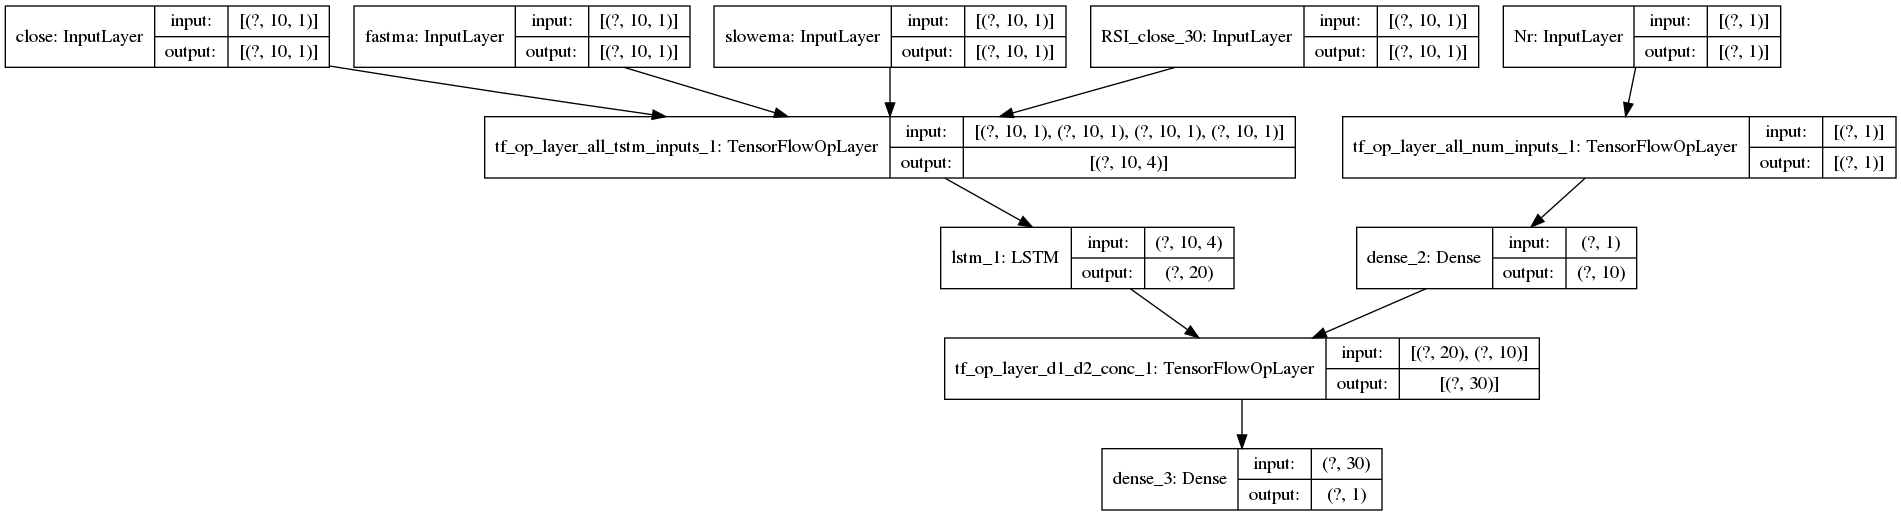

In [55]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True,)

In [56]:
#check if is working
for x, y in val_tf.take(1):
    #print(x,y)
    print(model.predict(x).shape)
    y_prob = model.predict(x)
    y_classes = y_prob.argmax(axis=-1)
    print(y_classes)

(775, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

### Train the model

In [57]:
EVALUATION_INTERVAL = 200
EPOCHS = 20

history = model.fit(train_tf, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_tf, 
                      validation_steps=50,
                      class_weight=class_weight)

Train for 200 steps, validate for 50 steps
Epoch 1/20
200/200 [==============================] - 6s 28ms/step - loss: 0.6860 - auc: 0.5687 - accuracy: 0.5248 - val_loss: 0.6758 - val_auc: 0.5983 - val_accuracy: 0.5561
Epoch 2/20
200/200 [==============================] - 4s 19ms/step - loss: 0.6801 - auc: 0.5839 - accuracy: 0.5248 - val_loss: 0.6751 - val_auc: 0.6042 - val_accuracy: 0.5561
Epoch 3/20
200/200 [==============================] - 4s 19ms/step - loss: 0.6781 - auc: 0.5886 - accuracy: 0.5248 - val_loss: 0.6755 - val_auc: 0.5987 - val_accuracy: 0.5561
Epoch 4/20
200/200 [==============================] - 4s 19ms/step - loss: 0.6772 - auc: 0.5901 - accuracy: 0.5248 - val_loss: 0.6756 - val_auc: 0.5955 - val_accuracy: 0.5561
Epoch 5/20
200/200 [==============================] - 4s 19ms/step - loss: 0.6764 - auc: 0.5917 - accuracy: 0.5248 - val_loss: 0.6774 - val_auc: 0.5878 - val_accuracy: 0.5561
Epoch 6/20
200/200 [==============================] - 4s 19ms/step - loss: 0.6758 

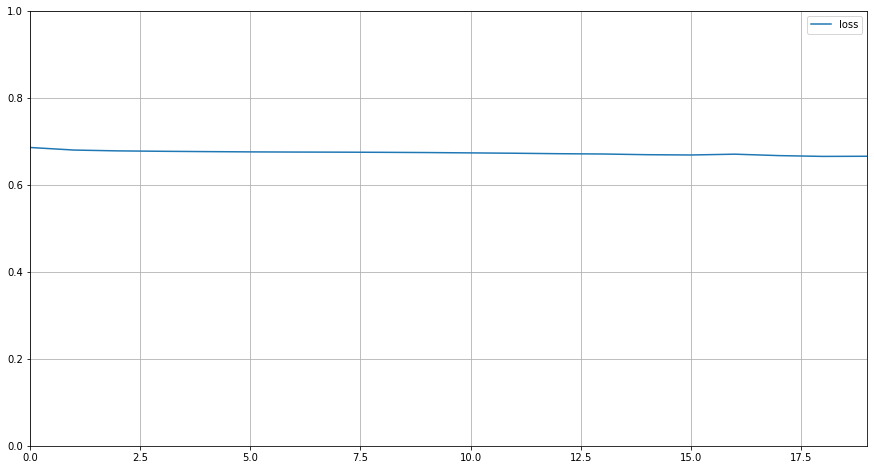

In [60]:
#plot the history
pd.DataFrame.from_dict({'loss':history.history['loss']}).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1.) # set the vertical range to [0-1]
plt.show()

### Predict test data

In [61]:
y_prob = model.predict(x=test_tf.batch(batch_size=1000), steps=1, verbose=True)

1/1 [==============================] - 0s 162ms/step


In [62]:
mpl.plotRoc(ty_test.numpy(), y_prob.flatten())

In [63]:
dir = x_test_df.dir.values
length = len(dir.flatten())
#ty_test.numpy().shape
mpl.plotRoc(ty_test.numpy(), dir.flatten())

In [64]:
random_predict = np.random.uniform(-1,0,length)
mpl.plotRoc(ty_test.numpy(), random_predict)

In [66]:
x_test_df['pred'] = y_prob
x_test_df['y'] = ty_test.numpy()
f = x_test_df.dir != x_test_df.y
x_test_df[f][['dir', 'pred', 'y']]
f2 = x_test_df[f][['dir', 'pred', 'y']].y == 0
x_test_df[f][['dir', 'pred', 'y']][f2]

,dir,pred,y
77,-1.0,0.401234,0.0
162,-1.0,0.331771,0.0
191,1.0,0.381621,0.0
200,1.0,0.317177,0.0
219,-1.0,0.277780,0.0
...,...,...,...
198,-1.0,0.290495,0.0
210,1.0,0.277293,0.0
212,-1.0,0.274960,0.0
230,-1.0,0.265975,0.0


In [67]:
f = x_test_df['pred'] > 0.5
x_test_df[f][['dir', 'pred', 'y']]

,dir,pred,y
85,1.0,1.000000,1.0
44,1.0,0.501015,1.0
304,1.0,1.000000,1.0
309,-1.0,1.000000,1.0
35,-1.0,0.571680,1.0
36,1.0,0.586312,0.0
64,-1.0,0.632428,1.0
89,1.0,0.510790,1.0
4,1.0,0.535598,0.0
11,-1.0,0.501270,1.0
